In [1]:
import os
from os.path import join as p_join
import sys
sys.path.insert(0, '..')
import time
import pickle
import json
from tqdm.notebook import tqdm
import itertools
import collections
from datetime import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import scipy
from matplotlib_venn import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import requests
pd.set_option('max.columns', 100)

In [4]:
DATE = '2020-01-01'
PROJECT_PATH = '..'

In [7]:
from src.parse_utils import (
    parse_supplies,
    parse_purchases,
    parse_sales,
    parse_storage,
    parse_report
)

from src.utils import create_wb_db_connection
eng = create_wb_db_connection()

from src.train.train_arima import make_df_for_arima, train_arimas
from src.predict.arimas_forecast import find_latest_model, make_forecast

In [8]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

---

In [9]:
df_for_forecast = make_df_for_arima()
df_for_forecast.head()

,subject,day,sum_sales
0,Бандажи коленные,2021-09-01,0.0
1,Бандажи коленные,2021-09-02,0.0
2,Бандажи коленные,2021-09-03,0.0
3,Бандажи коленные,2021-09-04,0.0
4,Бандажи коленные,2021-09-05,1.0


In [10]:
df_for_forecast.groupby(['subject'])['day'].count()

subject
Бандажи коленные                   141
Колтунорезки                       141
Корзинки                           141
Ложки чайные                       141
Маски для сна                      141
Миски для животных                 141
Наборы кухонных принадлежностей    141
Наборы столовых приборов           141
Органайзеры для хранения           141
Сумки                              141
Name: day, dtype: int64

In [14]:
# Обучение и сохранение арима моделей
models_dict, max_train_date = train_arimas()

Обучаем Аримы...


  0%|                                                                                                         | 0/10 [00:00<?, ?it/s]

====Обучаем ARIMA для subject=Бандажи коленные...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=696.377, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=669.622, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=689.305, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=618.684, Time=0.11 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=620.293, Time=0.29 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=616.510, Time=0.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=2.19 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=629.302, Time=0.26 sec
 ARIMA(2,1,0)(2,1,1)[1

/usr/local/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(0,1,2)(5,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


 ARIMA(0,1,2)(5,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,3)(4,1,0)[12]             : AIC=585.897, Time=1.43 sec
 ARIMA(1,1,3)(4,1,0)[12]             : AIC=587.898, Time=1.53 sec


 10%|█████████▌                                                                                      | 1/10 [01:52<16:49, 112.21s/it]

 ARIMA(0,1,2)(4,1,0)[12] intercept   : AIC=inf, Time=1.88 sec

Best model:  ARIMA(0,1,2)(4,1,0)[12]          
Total fit time: 111.958 seconds
ок
Модель для Бандажи коленные обучилась за 1.0 минут 52.20515277299998 секунд

====Обучаем ARIMA для subject=Колтунорезки...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=810.631, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=719.717, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=756.541, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=704.452, Time=0.14 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=701.333, Time=0.27 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=693.796, Time=0.62 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=693.888, Time=1.03 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=4.08 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time

 20%|███████████████████▍                                                                             | 2/10 [03:23<13:17, 99.64s/it]

 ARIMA(2,1,1)(5,1,0)[12] intercept   : AIC=inf, Time=7.53 sec

Best model:  ARIMA(2,1,1)(5,1,0)[12]          
Total fit time: 90.686 seconds
ок
Модель для Колтунорезки обучилась за 1.0 минут 30.84382976300003 секунд

====Обучаем ARIMA для subject=Корзинки...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=494.733, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=454.159, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=468.561, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=440.506, Time=0.11 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=436.943, Time=0.24 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=430.658, Time=0.59 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=431.355, Time=1.18 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=4.23 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=1.72 sec

 30%|████████████████████████████▊                                                                   | 3/10 [05:08<11:54, 102.13s/it]

 ARIMA(0,1,1)(4,1,0)[12] intercept   : AIC=396.376, Time=1.41 sec

Best model:  ARIMA(0,1,1)(4,1,0)[12]          
Total fit time: 104.856 seconds
ок
Модель для Корзинки обучилась за 1.0 минут 45.09102697399999 секунд

====Обучаем ARIMA для subject=Ложки чайные...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=546.390, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=449.388, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=493.600, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=445.323, Time=0.10 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=443.779, Time=0.21 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=443.611, Time=0.49 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=443.617, Time=0.85 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=4.63 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=1.8

 40%|██████████████████████████████████████▍                                                         | 4/10 [06:45<10:02, 100.34s/it]

 ARIMA(5,1,0)(5,1,0)[12] intercept   : AIC=415.914, Time=2.72 sec

Best model:  ARIMA(5,1,0)(5,1,0)[12]          
Total fit time: 97.426 seconds
ок
Модель для Ложки чайные обучилась за 1.0 минут 37.59052213299992 секунд

====Обучаем ARIMA для subject=Маски для сна...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=873.954, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=791.008, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=820.470, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=774.798, Time=0.15 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=772.400, Time=0.31 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=769.231, Time=0.98 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=767.661, Time=1.28 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=5.69 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time

 50%|████████████████████████████████████████████████▌                                                | 5/10 [08:15<08:02, 96.44s/it]

 ARIMA(4,1,0)(5,1,0)[12] intercept   : AIC=753.183, Time=3.62 sec

Best model:  ARIMA(4,1,0)(5,1,0)[12]          
Total fit time: 89.375 seconds
ок
Модель для Маски для сна обучилась за 1.0 минут 29.516405689000067 секунд

====Обучаем ARIMA для subject=Миски для животных...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=483.728, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=432.329, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=476.359, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=417.260, Time=0.13 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=411.605, Time=0.35 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=409.136, Time=0.62 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=408.896, Time=1.25 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=5.65 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=in

 60%|██████████████████████████████████████████████████████████▏                                      | 6/10 [09:59<06:36, 99.19s/it]

 ARIMA(3,1,1)(4,1,0)[12] intercept   : AIC=inf, Time=5.87 sec

Best model:  ARIMA(3,1,1)(4,1,0)[12]          
Total fit time: 104.321 seconds
ок
Модель для Миски для животных обучилась за 1.0 минут 44.52363992599999 секунд

====Обучаем ARIMA для subject=Наборы кухонных принадлежностей...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=300.195, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=228.747, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=270.404, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=199.172, Time=0.26 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=195.729, Time=0.43 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=191.849, Time=0.85 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=193.486, Time=1.57 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=193.138, Time=1.80 sec
 ARIMA(1,1,0)(3,1,1)[12]   

 70%|███████████████████████████████████████████████████████████████████▉                             | 7/10 [11:28<04:47, 95.79s/it]

 ARIMA(3,1,1)(0,1,2)[12] intercept   : AIC=inf, Time=1.84 sec

Best model:  ARIMA(3,1,1)(0,1,2)[12]          
Total fit time: 88.600 seconds
ок
Модель для Наборы кухонных принадлежностей обучилась за 1.0 минут 28.796741749000034 секунд

====Обучаем ARIMA для subject=Наборы столовых приборов...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1062.426, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1009.154, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1030.011, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1001.606, Time=0.13 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=995.188, Time=0.34 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=988.782, Time=0.76 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=978.902, Time=1.32 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=5.74 sec
 ARIMA(1,1,0)(4,1,1)[

 80%|████████████████████████████████████████████████████████████████████████████▊                   | 8/10 [15:44<04:53, 146.65s/it]

 ARIMA(0,1,1)(5,1,0)[12] intercept   : AIC=inf, Time=6.37 sec

Best model:  ARIMA(0,1,1)(5,1,0)[12]          
Total fit time: 255.109 seconds
ок
Модель для Наборы столовых приборов обучилась за 4.0 минут 15.547441102000107 секунд

====Обучаем ARIMA для subject=Органайзеры для хранения...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.219, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=591.522, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=561.518, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=581.313, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=576.856, Time=0.05 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=593.103, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]           

 90%|██████████████████████████████████████████████████████████████████████████████████████▍         | 9/10 [15:55<01:44, 104.31s/it]

 ARIMA(0,1,2)(0,1,1)[12] intercept   : AIC=562.301, Time=0.21 sec

Best model:  ARIMA(0,1,2)(0,1,1)[12]          
Total fit time: 11.201 seconds
ок
Модель для Органайзеры для хранения обучилась за 0.0 минут 11.22375272599993 секунд

====Обучаем ARIMA для subject=Сумки...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=606.672, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=558.859, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=514.746, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=562.933, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=535.417, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=558.899, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=514.564, 

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [16:01<00:00, 96.16s/it]

 ARIMA(1,1,1)(0,1,1)[12] intercept   : AIC=515.818, Time=0.41 sec

Best model:  ARIMA(1,1,1)(0,1,1)[12]          
Total fit time: 6.210 seconds
ок
Модель для Сумки обучилась за 0.0 минут 6.224782380000079 секунд

Аримы для всех subjects обучились за 16.0 минут 1.5730359789999966 секунд
Сохраняем модели...


ок


In [21]:
# Сохранение предсказаний
make_forecast()

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 102.35it/s]


Сохраняем предсказания...
ок


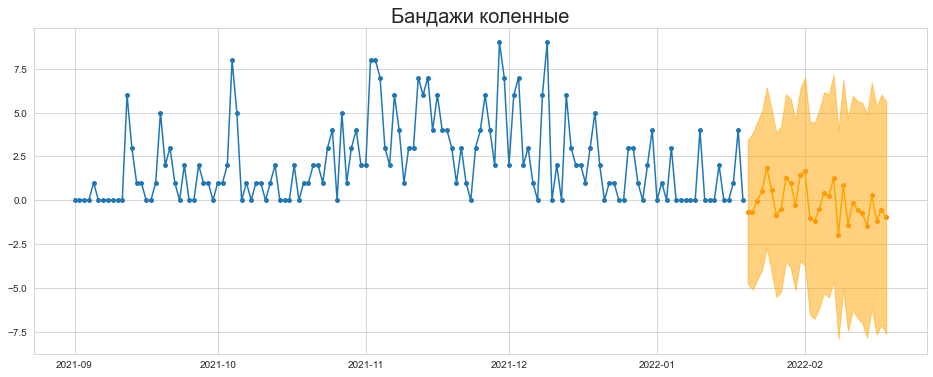

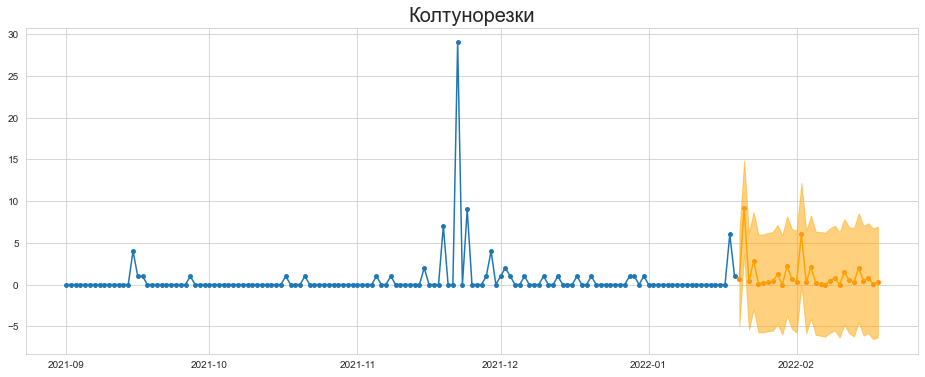

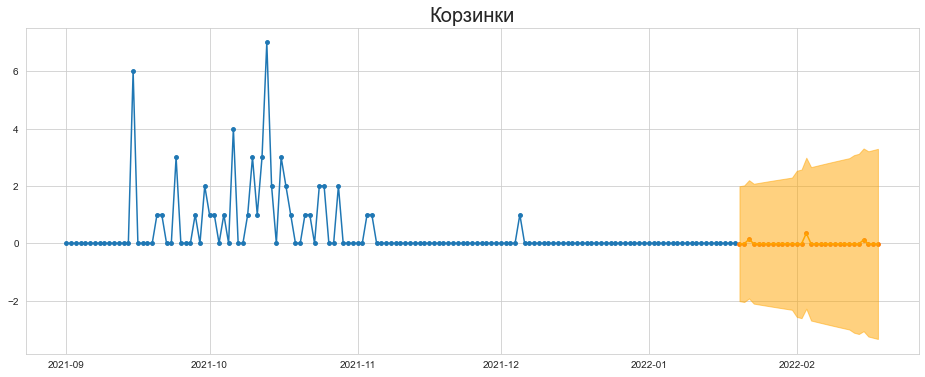

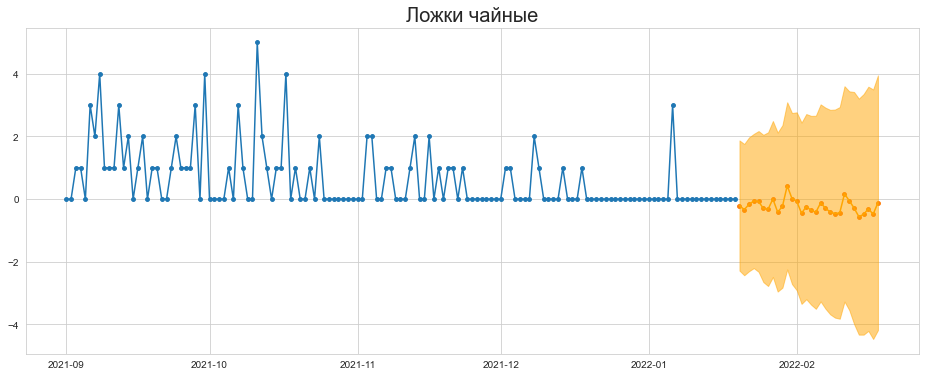

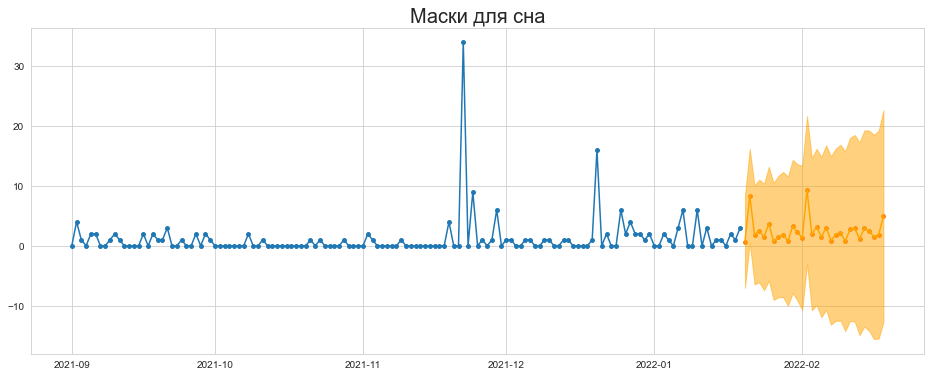

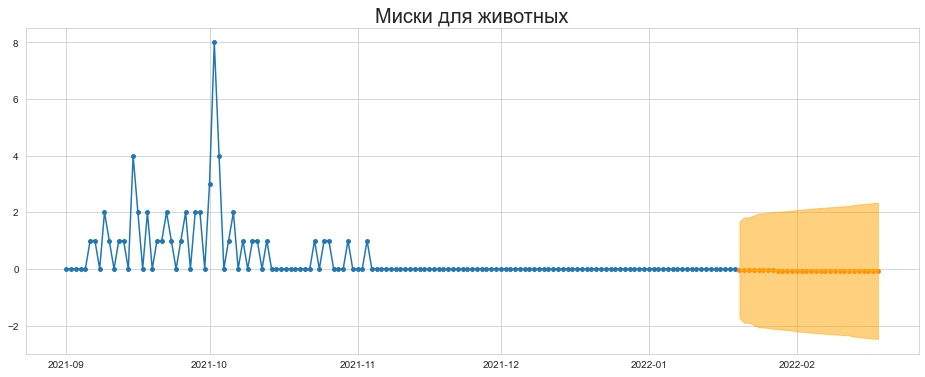

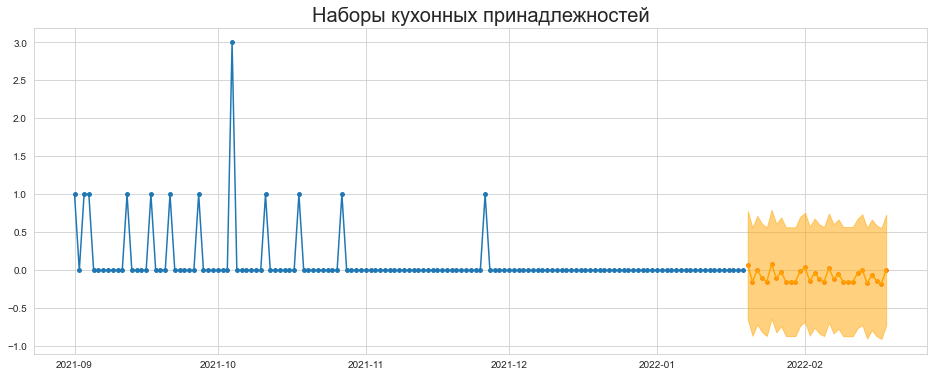

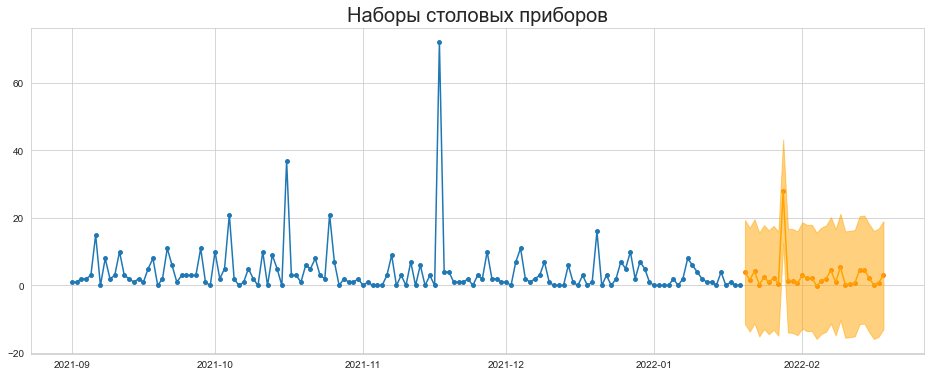

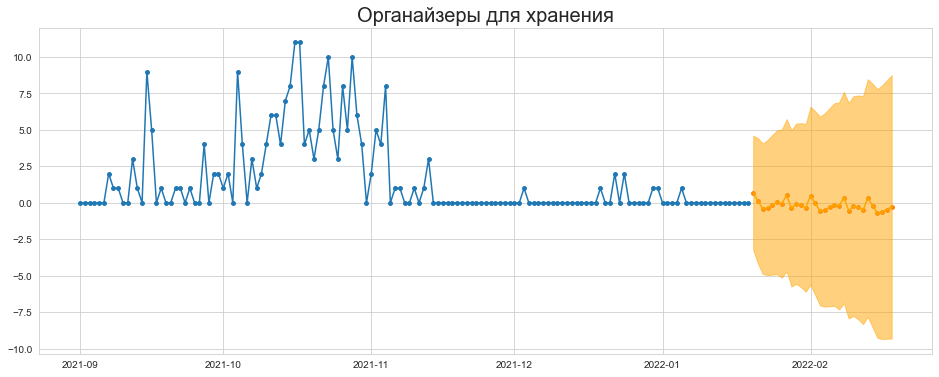

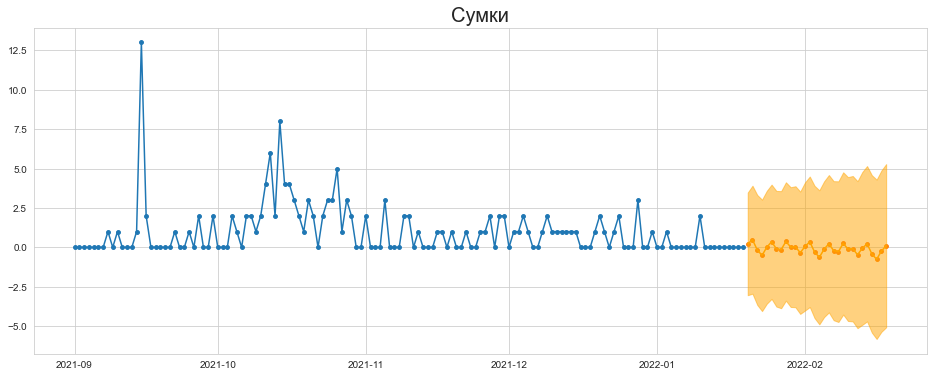

In [28]:
N = 30
if 'models_dict' not in locals():
    models_dict = pickle.load(
        open(p_join(PROJECT_PATH, 'models', find_latest_model(), 'arima_models.pkl'), mode='rb')
    )

for subject in df_for_forecast['subject'].unique():
    if subject in models_dict:
        preds, confint = models_dict[subject].predict(n_periods=N, return_conf_int=True)
    else:
        print(f'{subject} not in models_dict')
        continue
    plt.figure(figsize=(16, 6))
    plt.title(f'{subject}', fontsize=20);
    plt.scatter(df_for_forecast[(df_for_forecast['subject'] == subject)]['day'], 
                df_for_forecast[(df_for_forecast['subject'] == subject)].sum_sales, s=15);
    plt.plot(df_for_forecast[(df_for_forecast['subject'] == subject)]['day'], 
             df_for_forecast[(df_for_forecast['subject'] == subject)].sum_sales);
    forecast_dates = [(df_for_forecast['day'].max() + pd.DateOffset(days=i)).date() for i in range(1, N+1)]
    plt.plot(forecast_dates, preds, color='orange');
    plt.scatter(forecast_dates, preds, s=15);
    plt.fill_between(forecast_dates, confint[:, 1], confint[:, 0], color='orange', alpha=0.5);
